In [2]:
# Jeff Dunagin
# DSC 530
# Exercise 5.2
# 16 January 2022

In [3]:
# import all of their stuff
#from __future__ import print_function, division

#%matplotlib inline

#import numpy as np

#import nsfg
#import first
#import analytic

#import thinkstats2
#import thinkplot
# might delete this block

#  5.1

In [4]:
import scipy.stats

In [5]:
# input mean, standard deviation of height for men
mu = 178 # cm
sigma = 7.7 # cm
norm = scipy.stats.norm(mu, sigma)

In [6]:
min_height = 177.8 # 5'10 in cm
max_height = 185.4 # 6'1 in cm
percentage = norm.cdf(max_height) - norm.cdf(min_height)
percentage

0.3420946829459531

34% of males fall in this range.

# 5.2

In [10]:
import matplotlib.pyplot as plt
import numpy as np

In [15]:
xmin = 1 # in m
alpha = 1.7
pareto = scipy.stats.pareto(b=alpha, scale=xmin)

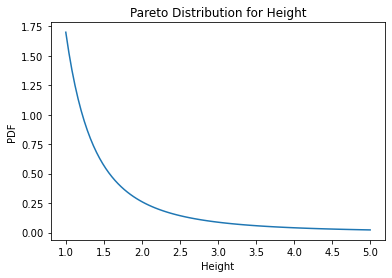

In [16]:
x = np.linspace(1,5,100)
plt.plot(x, pareto.pdf(x))
plt.xlabel('Height')
plt.ylabel('PDF')
plt.title('Pareto Distribution for Height')
plt.show()

In [17]:
# mean height
mean_height = pareto.mean()
mean_height

2.428571428571429

Mean height is 2.43 meters, or just under 8 feet. Very tall

In [18]:
# percentage shorter than the mean
pareto.cdf(mean_height)

0.778739697565288

78% of the world is shorter than the mean

In [19]:
# How many taller than 1 km?
(1 - pareto.cdf(1000)) * 7e9

55602.976430479954

We expect ~55600 people to be taller than 1 km

In [20]:
# Tallest person in world of 7 billion? Use ppf (inverse of cdf)
pareto.ppf((7e9 - 1)/7e9)

618349.6106759505

Tallest person should be about 618 km tall

# 6.1

In [21]:
import hinc2
income_df = hinc2.hinc.ReadData()

In [22]:
# Just looking at the data
income_df

,income,freq,cumsum,ps
0,4999.0,4204,4204,0.034330
1,9999.0,4729,8933,0.072947
2,14999.0,6982,15915,0.129963
3,19999.0,7157,23072,0.188407
4,24999.0,7131,30203,0.246640
5,29999.0,6740,36943,0.301679
6,34999.0,6354,43297,0.353566
7,39999.0,5832,49129,0.401191
8,44999.0,5547,54676,0.446488
9,49999.0,5254,59930,0.489392


In [23]:
def InterpolateSample(df, log_upper):
    """Makes a sample of log10 household income.

    Assumes that log10 income is uniform in each range.

    df: DataFrame with columns income and freq
    log_upper: log10 of the assumed upper bound for the highest range

    returns: NumPy array of log10 household income
    """
    # compute the log10 of the upper bound for each range
    df['log_upper'] = np.log10(df.income)

    # get the lower bounds by shifting the upper bound and filling in
    # the first element
    df['log_lower'] = df.log_upper.shift(1)
    df.loc[0, 'log_lower'] = 3.0

    # plug in a value for the unknown upper bound of the highest range
    df.loc[41, 'log_upper'] = log_upper
    
    # use the freq column to generate the right number of values in
    # each range
    arrays = []
    for _, row in df.iterrows():
        #print(row.freq)
        vals = np.linspace(row.log_lower, row.log_upper, int(row.freq)) # had to put int around row.freq
        arrays.append(vals)

    # collect the arrays into a single sample
    log_sample = np.concatenate(arrays)
    return log_sample


In [24]:
log_sample = InterpolateSample(income_df, log_upper=6.0)

In [25]:
# convert from log to regular
sample = np.power(10, log_sample)

In [26]:
np.median(sample)

51226.93306562372

Median is $52,226.93

In [27]:
np.mean(sample)

74278.7075311872

Mean is $74,278.71

In [153]:
scipy.stats.skew(sample)

4.949920244429584

Fisher-Pearson's  coefficient of skewness is 4.95

In [28]:
Pearson_med_skew = (3 * (np.mean(sample) - np.median(sample)))/np.std(sample)
Pearson_med_skew

0.7361105192428792

Pearson's median skewness coefficient is 0.74

In [161]:
# time for obnoxious variables...
number_people_who_earn_less_than_the_mean = len(sample[np.where(sample<np.mean(sample))])
total_number_of_people = len(sample)
percentage_of_people_who_earn_less_than_the_mean = number_people_who_earn_less_than_the_mean / total_number_of_people
percentage_of_people_who_earn_less_than_the_mean

0.660005879566872

66 percent of people earn less than the mean

In [164]:
# try this again with upper limit 10^7
log_sample = InterpolateSample(income_df, log_upper=7.0)
sample = np.power(10, log_sample)

number_people_who_earn_less_than_the_mean = len(sample[np.where(sample<np.mean(sample))])
total_number_of_people = len(sample)
percentage_of_people_who_earn_less_than_the_mean = number_people_who_earn_less_than_the_mean / total_number_of_people
percentage_of_people_who_earn_less_than_the_mean

0.8565630665207663

With a higher upper limit, more people earn less than the mean. This would suggest that this increases the skew, and increases the mean more than the median

In [166]:
print('Median {}'.format(np.median(sample)))
print('Mean {}'.format(np.mean(sample)))
print('Skew {}'.format(scipy.stats.skew(sample)))

Median 51226.93306562372
Mean 124267.39722164697
Skew 11.603690267537788


The above conclusions are correct